# Plots for figure 1

1. Correlation between RNA and DNA methylation
2. Correlation between RNA and protein 
3. ORA overlap between protein DNA methylation and RNA 

We also want to calculate the DNA methylation Beta value as opposed to just the M value change since we want to mainly use this! 

In [21]:
# Need to add in entrez gene ID and also make labels for genes for ORA
# Imports
from scircm import *  # Note if you have a mac M1 use from sircle import * and you won't be able to do 7,8
import seaborn as sns
from sciutil import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

# Setup file locations and label of the cancer
u = SciUtil()

cancer = 'PanCan'
input_dir = 'Input_RCM'
output_dir = 'Output_Data'
supp_dir = 'Required_Refs'
fig_dir = 'Output_Figures'
regLabel = 'RG2_Changes_filtered'

# Use same files as in RCM
DNA_methylation_file = os.path.join('Input_Methylation', f'{cancer}_filtered_DCpG_EarlyLate.csv')
RNA_file = os.path.join('Input_RNAseq', f'{cancer}_filtered_DE_RNA_EarlyLate.csv')
protein_file = os.path.join('Input_Protein', f'{cancer}_filtered_DA_Protein_EarlyLate.csv')

# Names of columns in each of the above files
logFC_RNA_column = "logFC_rna"
padj_RNA_column = "padj_rna"
betadiff_DNA_methylation_column = "beta_diff"
padj_DNA_methylation_column = 'adj.P.Val'
logFC_protein_column = "logFC_protein"
padj_protein_column = "padj_protein"

# NOTE: all of the above files MUST have this column i.e. they must all have the samely named gene ID column
gene_id_column = "gene_name"

# Use same cutoffs as in RCM
rna_padj_cutoff = 0.05
prot_padj_cutoff = 0.05
meth_padj_cutoff = 0.05

rna_logfc_cutoff = 0.25
prot_logfc_cutoff = 0.1
meth_diff_cutoff = 0.1

# Join the DCpG file with the epic manifest and then filter the file
# Annotate the gene names to entrez gene IDs using annotation file from HG38
annot = pd.read_csv(os.path.join(supp_dir, 'hsapiens_gene_ensembl-GRCh38.p13.csv'))
annot = annot.dropna(subset=['external_gene_name', 'entrezgene_id'])
annot = annot.drop_duplicates(subset='external_gene_name')
name_to_entrez = dict(zip(annot.external_gene_name, annot.entrezgene_id))

# m_df = pd.read_csv(DNA_methylation_file)
# m_df.rename(columns={'logFC': 'M_diff'}, inplace=True)
# # Then also calculate beta value change for each summarised CpG.
# # Use the information in the sample files.
# methylation_sample_file = pd.read_csv(os.path.join('Input_Methylation', f'{cancer}_filtered_samples_CpG.csv'))
# tumour_samples = list(methylation_sample_file[methylation_sample_file['CondID'] == 1]['Sample'].values)
# normal_samples = list(methylation_sample_file[methylation_sample_file['CondID'] == 0]['Sample'].values)
# beta_diff = np.mean(m_df[tumour_samples].values, axis=1) - np.mean(m_df[normal_samples].values, axis=1)
# m_df['beta_diff'] = beta_diff
# m_df.to_csv(DNA_methylation_file, index=False)

/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_22327/2136975437.py:49: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  annot = pd.read_csv(os.path.join(supp_dir, 'hsapiens_gene_ensembl-GRCh38.p13.csv'))


## Figure 1A 

Plot and calculate the DNA methylation and protein correlation


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_22327/33370718.py:9: DtypeWarning: Columns (601) have mixed types. Specify dtype option on import or set low_memory=False.
  m_df = pd.read_csv(DNA_methylation_file)


--------------------------------------------------------------------------------
Pearsons R:	PearsonRResult(statistic=0.002875020448098878, pvalue=0.8121551825478995)	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Spearmans rho:	SignificanceResult(statistic=-0.013716327603213252, pvalue=0.25686569464617276)	
--------------------------------------------------------------------------------


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/scatterplot.py:114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(vis_df[x].values, vis_df[y].values, c=self.colour, alpha=self.opacity,


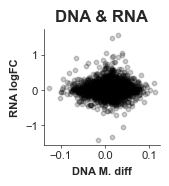

--------------------------------------------------------------------------------
Pearsons R:	PearsonRResult(statistic=0.10618686808821916, pvalue=1.48464423463909e-20)	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Spearmans rho:	SignificanceResult(statistic=0.10033232288078031, pvalue=1.649452384454713e-18)	
--------------------------------------------------------------------------------


/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/sciviso/scatterplot.py:114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(vis_df[x].values, vis_df[y].values, c=self.colour, alpha=self.opacity,


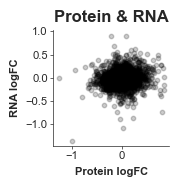

In [22]:
# RNA and Methylation correlation
from sciviso import *
from scipy.stats import pearsonr, spearmanr
from sciutil import *
import matplotlib.pyplot as plt

u = SciUtil()

m_df = pd.read_csv(DNA_methylation_file)
df = pd.read_csv(RNA_file)

m_df.set_index(gene_id_column, inplace=True)
df.set_index(gene_id_column, inplace=True)

# Join on gene name
joined_df = m_df.join(df, how='inner')

# Correlation 
u.dp(['Pearsons R:', pearsonr(joined_df[betadiff_DNA_methylation_column].values, joined_df[logFC_RNA_column].values)])
u.dp(['Spearmans rho:', spearmanr(joined_df[betadiff_DNA_methylation_column].values, joined_df[logFC_RNA_column].values)])

# plot and print 
sc = Scatterplot(joined_df, betadiff_DNA_methylation_column, logFC_RNA_column, 
                 'DNA & RNA', 'DNA M. diff', 'RNA logFC', 
                 config={'figsize': (1.5, 1.5), 'opacity': 0.2}, 
                 colour='black')
sc.plot()
plt.savefig(os.path.join(fig_dir, f'Figure4A_MethylationRNA.svg'))
plt.show()

# Do the same with RNA and protein
p_df = pd.read_csv(protein_file)
df = pd.read_csv(RNA_file)

p_df.set_index(gene_id_column, inplace=True)
df.set_index(gene_id_column, inplace=True)

# Join on gene name
joined_df = p_df.join(df, how='inner')

# Correlation 
u.dp(['Pearsons R:', pearsonr(joined_df[logFC_protein_column].values, joined_df[logFC_RNA_column].values)])
u.dp(['Spearmans rho:', spearmanr(joined_df[logFC_protein_column].values, joined_df[logFC_RNA_column].values)])

# plot and print 
sc = Scatterplot(joined_df, logFC_protein_column, logFC_RNA_column,  'Protein & RNA', 
                 'Protein logFC', 'RNA logFC', 
                 config={'figsize': (1.5, 1.5), 'opacity': 0.2}, 
                 colour='black')
sc.plot()
plt.savefig(os.path.join(fig_dir, f'Figure4A_ProteinRNA.svg'))


In [16]:
p_df

,C3L.00977_Tumor_Protein_CPT0169640003,C3L.00987_Tumor_Protein_CPT0127050003,C3L.00994_Tumor_Protein_CPT0169730003,C3L.00995_Tumor_Protein_CPT0169890003,C3L.00997_Tumor_Protein_CPT0123180003,C3L.00999_Tumor_Protein_CPT0123260003,C3L.01138_Tumor_Protein_CPT0199700003,C3L.01237_Tumor_Protein_CPT0199820003,C3L.02621_Tumor_Protein_CPT0201830004,C3L.02651_Tumor_Protein_CPT0241980004,...,C3N.04119_Tumor_Protein_CPT0237910004,C3N.04126_Tumor_Protein_CPT0238040005,C3N.04282_Tumor_Protein_CPT0246990003,C3N.04283_Tumor_Protein_CPT0247040003,logFC_protein,stat_protein,pvalue_protein,padj_protein,B_protein,mean_protein
gene_name,,,,,,,,,,,,,,,,,,,,,
A1BG,7.387152,7.424999,7.996518,7.559925,7.426752,7.507133,8.084690,7.453032,8.331555,7.430781,...,7.885084,7.527077,7.288104,8.228940,0.188378,1.417918,0.156921,0.795729,-4.539619,7.463754
A2M,7.215794,7.574171,8.574027,7.416792,7.177043,7.626990,7.709426,7.225891,7.730628,7.645751,...,7.232205,7.410937,7.008287,7.805163,-0.094698,-0.567415,0.570721,0.934621,-5.176209,7.244620
AAAS,7.774335,7.834601,7.692197,7.709516,7.877938,7.780421,8.264593,7.780495,7.846316,7.743360,...,7.757136,7.882377,7.371649,7.947072,0.115863,1.503886,0.133326,0.771913,-4.445179,7.820898
AACS,7.389574,7.403434,7.141541,7.605571,7.908832,7.353853,7.950235,7.078192,7.289130,7.815626,...,7.686280,7.580603,6.977093,7.431460,0.068832,0.464089,0.642813,0.950573,-5.216492,7.792935
AADAC,6.822509,10.267980,6.657711,5.091831,7.952216,6.382945,6.198482,7.319502,6.749237,5.267852,...,6.815122,5.297464,6.328847,5.806993,0.059717,0.178243,0.858614,0.980130,-5.285918,6.770154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZW10,7.669144,7.661642,7.593790,7.849961,7.755746,7.795452,7.769025,7.707565,7.704583,7.753046,...,7.847901,7.655397,7.987907,7.599802,-0.104546,-1.504427,0.133187,0.771913,-4.444568,7.821391
ZWILCH,8.222730,7.683481,7.656892,7.765205,8.086300,7.691579,8.155462,7.474461,7.988410,8.208112,...,7.351312,7.541231,7.876854,8.056230,0.107701,0.619174,0.536121,0.924005,-5.153001,7.853780
ZYG11B,7.635822,7.820625,7.993186,7.662464,7.776461,7.462878,7.605399,7.936190,7.877919,7.631665,...,8.029877,7.903994,8.154525,7.976451,-0.067365,-0.761686,0.446654,0.911607,-5.078667,7.773267


## Figure 1B 

Plot and visualise the overlap of ORA for the top terms, first we need to make "groups" for the different ORAs and top genes.

We do this for each of the above files (i.e. DNA methylation, gene expression and protein)



In [17]:
# -------------------------------------------------------------------
#                Make ORA groups for DNA methylation
# -------------------------------------------------------------------

# Add in entrez gene ID and a label for each gene for DNA methylation
m_df = pd.read_csv(DNA_methylation_file)
entrez, labels = [], []
padjs, logfcs = m_df[padj_DNA_methylation_column].values, m_df[betadiff_DNA_methylation_column].values
for i, gene in enumerate(m_df[gene_id_column].values):
    label = 'NA'
    entrez.append(name_to_entrez.get(gene))
    if padjs[i] < meth_padj_cutoff:
        if logfcs[i] < (-1 * meth_diff_cutoff):
            label = 'Hypo' # Hypo methylation
        elif logfcs[i] > meth_diff_cutoff:
            label = 'Hyper' # Hyper methylation i.e. "maybe" driving down reg.
    labels.append(label)
m_df['ORA_label'] = labels
m_df['entrezgene_id'] = entrez
m_df = m_df[[gene_id_column, 'entrezgene_id', 'ORA_label', padj_DNA_methylation_column, 
             betadiff_DNA_methylation_column]]
m_df = m_df.dropna()
m_df.to_csv(os.path.join(output_dir, f'DNAMethylation_{cancer}_ORA_EarlyLate.csv'), index=False)
 
            
# -------------------------------------------------------------------
#                Make ORA groups for Gene expression
# -------------------------------------------------------------------
df = pd.read_csv(RNA_file)
entrez, labels = [], []
padjs, logfcs = df[padj_RNA_column].values, df[logFC_RNA_column].values
for i, gene in enumerate(df[gene_id_column].values):
    label = 'NA'
    entrez.append(name_to_entrez.get(gene))
    if padjs[i] < rna_padj_cutoff:
        if logfcs[i] < (-1 * rna_logfc_cutoff):
            label = 'DOWN' # Repressed
        elif logfcs[i] > rna_logfc_cutoff:
            label = 'UP' # Increased Expression
    labels.append(label)
df['ORA_label'] = labels
df['entrezgene_id'] = entrez
df = df[[gene_id_column, 'entrezgene_id', 'ORA_label', padj_RNA_column, logFC_RNA_column]]
df = df.dropna()
df.to_csv(os.path.join(output_dir, f'RNA_{cancer}_ORA_EarlyLate.csv'), index=False)

# -------------------------------------------------------------------
#                Make ORA groups for Protein
# -------------------------------------------------------------------
df = pd.read_csv(protein_file)
entrez, labels = [], []
padjs, logfcs = df[padj_protein_column].values, df[logFC_protein_column].values
for i, gene in enumerate(df[gene_id_column].values):
    label = 'NA'
    entrez.append(name_to_entrez.get(gene))
    if padjs[i] < prot_padj_cutoff:
        if logfcs[i] < (-1 * prot_logfc_cutoff):
            label = 'DOWN' # Repressed
        elif logfcs[i] > prot_logfc_cutoff:
            label = 'UP' # Increased expression
    labels.append(label)
df['ORA_label'] = labels
df['entrezgene_id'] = entrez
df = df[[gene_id_column, 'entrezgene_id', 'ORA_label', padj_protein_column, logFC_protein_column]]
df = df.dropna()
df.to_csv(os.path.join(output_dir, f'Protein_{cancer}_ORA_EarlyLate.csv'), index=False)


/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_22327/217458901.py:6: DtypeWarning: Columns (601) have mixed types. Specify dtype option on import or set low_memory=False.
  m_df = pd.read_csv(DNA_methylation_file)


(array([   5.,   12.,   11.,   65.,  182.,  288.,  991.,  982., 2153.,
        3045.]),
 array([0.32335224, 0.39101174, 0.45867123, 0.52633073, 0.59399022,
        0.66164972, 0.72930921, 0.79696871, 0.86462821, 0.9322877 ,
        0.9999472 ]),
 <BarContainer object of 10 artists>)

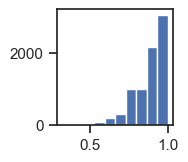

In [18]:
plt.hist(df['padj_protein'])

## Look at overlap now (after going to R and running SiRCle ORA)

Code to run ORA on each of the above files:

```{r}
library(EnhancedVolcano)
library(org.Hs.eg.db)#For Human load:
library(clusterProfiler)#To run ORA
library(enrichplot)#For emapplot, dotplot,...
library(ggplot2)#For saving and legends
library(tidyverse) # used for data manipulation
#Establish a couple of functions needed to perform the GSEA (made by Aurelien)
library(fgsea)
library(GSEABase)

#  ----------------------------------------------------------------------------------------------
#                  File and naming setup
#  ----------------------------------------------------------------------------------------------

GSEA_file_dir <- 'Required_Refs/GSEA/' # Will need to change the path if you're on windows
figure_dir <- 'Output_Figures'
input_data_dir <- 'Output_Data'
output_data_dir <- 'Output_Data/ORA/'
cancer <- 'Renal_cell_carcinoma__NOS'

sircleFileName <- file.path(input_data_dir, paste0('sircle_PorMandR_', cancer, '.csv'))

# Run the ORA

#Import the pathways:
KEGG <- read.csv(file.path(GSEA_file_dir,  "c2.cp.kegg.v6.2.symbols.csv"))
Reactome <- read.csv(file.path(GSEA_file_dir,  "c2.cp.reactome.v6.2.symbols.csv"))
Biocarta <- read.csv(file.path(GSEA_file_dir, "c2.cp.biocarta.v6.2.symbols.csv"))
Hallmarks <- read.csv(file.path(GSEA_file_dir,  "h.all.v6.2.symbols.csv"))
GO_BP <- read.csv(file.path(GSEA_file_dir, "c5.go.bp.v7.2.symbols.csv"))
GO_CC <- read.csv(file.path(GSEA_file_dir, "c5.go.cc.v7.2.symbols.csv"))
GO_MF <- read.csv(file.path(GSEA_file_dir, "c5.go.mf.v7.2.symbols.csv"))
Metabolic <- read.csv(file.path(GSEA_file_dir, "41467_2016_BFncomms13041_MOESM340_ESM.csv"))
Correction <- read.csv(file.path(GSEA_file_dir, "41467_2016_BFncomms13041_MOESM340_ESM.csv"))

#Run the GSEA analysis
##1."KEGG", "Reactome", "Biocarta", "Hallmarks"
pathways <- rbind(KEGG, Reactome, Biocarta, Hallmarks)
pathway_list <- list()
for (pathway in unique(pathways$term)) {
  pathway_list[[pathway]] <- as.character(pathways[pathways$term == pathway, 1])
}

sircleORAHuman <- function(filename, entrezId, title, regLabels="RegulatoryLabels", emptyRegLabel="", fileType="pdf",
                           minGSSize=10, qvalueCutoff=0.2, pvalueCutoff=0.05, showCatagory=30, outputFolder='') {
  ## ------------ Setup and installs ----------- ##
  packages <- c("org.Hs.eg.db", "clusterProfiler", "svglite", "enrichplot")
  install.packages(setdiff(packages, rownames(installed.packages())))
  library(org.Hs.eg.db)
  library(clusterProfiler)
  library(svglite)
  library(enrichplot)
  ## ------------ Run ----------- ##
  # open the data
  df <- read.csv(filename)
  allGenes <- as.character(df[[entrezId]]) #
  clusterGenes <- subset(df, ! df[[regLabels]] == emptyRegLabel)
  clusterGenes <- subset(clusterGenes, ! clusterGenes[[regLabels]] == "Not-Background")

  grps_labels <- unlist(unique(clusterGenes[regLabels]))
  for(g in grps_labels) {
    grpGenes <- subset(df, df[[regLabels]] == g)
    print(g)
    print(dim(grpGenes))
    clusterGo <- enrichGO(gene = as.character(grpGenes[[entrezId]]),
                          universe = allGenes,
                          keyType = "ENTREZID",
                          OrgDb = org.Hs.eg.db,
                          ont = "ALL",
                          pAdjustMethod = "BH",
                          qvalueCutoff = 1.0,
                          pvalueCutoff = 1.0,
                          minGSSize = minGSSize,
                          readable = TRUE)
    # We have a cutoff of all of them, and then only visualise the ones that the user wants...

    clusterGoSummary <- data.frame(clusterGo)
    write.csv(clusterGoSummary, paste(outputFolder, 'ClusterGoSummary_', g, title, '.csv', sep=""))#Export the ORA results as .csv

    if (!(dim(clusterGoSummary)[1] == 0)) {#exclude df's that have no observations
      Dotplot <- dotplot(clusterGo, showCategory=showCatagory) +
        ggtitle(paste("Dotplot ", g, sep=""))
      ggsave(file=paste(outputFolder, "SiRCle-ORA_Dotplot_Human_", g, title, ".", fileType, sep=""), plot=Dotplot, width=10, height=8)
      x2 <- pairwise_termsim(clusterGo)

      Emapplot <- emapplot(x2, pie_scale=1.5, layout = "nicely")+
        ggtitle(paste("Emapplot ", g, sep=""))
      ggsave(file=paste(outputFolder, "SiRCle-ORA_Emapplot_Human_", g, title, ".", fileType, sep="" ), plot=Emapplot, width=10, height=8)

      Heatplot <- heatplot(clusterGo,showCategory=showCatagory) +
        theme(axis.text.x =element_text(size=5), axis.text.y =element_text(size=8,face="bold"), axis.title=element_text(size=12,face="bold"))+
        ggtitle(paste("Heatplot ", g, sep=""))
      ggsave(file=paste(outputFolder, "SiRCle-ORA_Heatplot_Human_", g,title,  ".", fileType, sep="" ), plot=Heatplot, width=10, height=8)

    }
  }
}

sircleFileName <- file.path(input_data_dir, paste0('Protein_', cancer, '_ORA.csv'))
test_title <- '_protein'
sircleORAHuman(sircleFileName, "entrezgene_id", test_title, 'ORA_label', emptyRegLabel="None", minGSSize=10, qvalueCutoff=0.1, outputFolder=output_data_dir)

sircleFileName <- file.path(input_data_dir, paste0('RNA_', cancer, '_ORA.csv'))
test_title <- '_RNA'
sircleORAHuman(sircleFileName, "entrezgene_id", test_title, 'ORA_label', emptyRegLabel="None", minGSSize=10, qvalueCutoff=0.1, outputFolder=output_data_dir)

sircleFileName <- file.path(input_data_dir, paste0('DNAMethylation_', cancer, '_ORA.csv'))
test_title <- '_Methylation'
sircleORAHuman(sircleFileName, "entrezgene_id", test_title, 'ORA_label', emptyRegLabel="None", minGSSize=10, qvalueCutoff=0.1, outputFolder=output_data_dir)

```

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/matplotlib_venn/_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")
/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


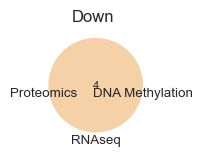

/Users/ariane/opt/miniconda3/envs/roundround/lib/python3.10/site-packages/matplotlib_venn/_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")


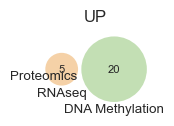

In [19]:
from matplotlib_venn import venn3

ora_dir = os.path.join(output_dir, 'ORA_EarlyLate')
# Get the overlapping GO terms that were significant 
try:
    p_go = pd.read_csv(os.path.join(ora_dir, f'ClusterGoSummary_DOWN_protein.csv'))
    p_go = p_go[p_go['p.adjust'] < 0.05]['Description'].values # Get sig terms
except:
    p_go = []
m_go = pd.read_csv(os.path.join(ora_dir, f'ClusterGoSummary_Hyper_Methylation.csv'))
m_go = m_go[m_go['p.adjust'] < 0.05]['Description'].values # Get sig terms

r_go = pd.read_csv(os.path.join(ora_dir, f'ClusterGoSummary_DOWN_RNA.csv'))
r_go = r_go[r_go['p.adjust'] < 0.05]['Description'].values # Get sig terms


venn3([set(p_go), set(r_go), set(m_go)], set_labels=['Proteomics', 'RNAseq', 'DNA Methylation'],
      set_colors=('#0101d7', '#e68e25', '#6aaf44'),)
plt.rcParams['svg.fonttype'] = 'none'
plt.title('Down')
plt.savefig(os.path.join(fig_dir, f'Figure4B_DownGO.svg'))
plt.show()

# Get the overlapping GO terms that were significant 
try:
    p_go = pd.read_csv(os.path.join(ora_dir, f'ClusterGoSummary_UP_protein.csv'))
    p_go = p_go[p_go['p.adjust'] < 0.05]['Description'].values # Get sig terms
except:
    p_go = []
m_go = pd.read_csv(os.path.join(ora_dir, f'ClusterGoSummary_Hypo_Methylation.csv'))
m_go = m_go[m_go['p.adjust'] < 0.05]['Description'].values # Get sig terms

r_go = pd.read_csv(os.path.join(ora_dir, f'ClusterGoSummary_UP_RNA.csv'))
r_go = r_go[r_go['p.adjust'] < 0.05]['Description'].values # Get sig terms


venn3([set(p_go), set(r_go), set(m_go)], set_labels=['Proteomics', 'RNAseq', 'DNA Methylation'],
      set_colors=('#0101d7', '#e68e25', '#6aaf44'),)
plt.rcParams['svg.fonttype'] = 'none'
plt.title('UP')
plt.savefig(os.path.join(fig_dir, 'Figure4B_UPGO.svg'))


## We want to also see what the overlaps between the three data types are 

In [20]:
import pandas as pd
from sciutil import SciUtil
from matplotlib_venn import venn3
import matplotlib.pyplot as plt


u = SciUtil()

test_title = 'PanCan'

comparisons = {'Down regulated': ['ClusterGoSummary_DOWN_RNA.csv',
                                  'ClusterGoSummary_DOWN_protein.csv',
                                  'ClusterGoSummary_Hyper_Methylation.csv'
                                 ],
               'Up regulated': ['ClusterGoSummary_UP_RNA.csv',
                                'ClusterGoSummary_UP_protein.csv',
                                 'ClusterGoSummary_Hypo_Methylation.csv'
                                 ]
              }
for c in comparisons:
    rna_df = pd.read_csv(os.path.join(ora_dir, f'{comparisons[c][0]}'))
    protein_df = pd.read_csv(os.path.join(ora_dir, f'{comparisons[c][1]}'))
    cpg_df = pd.read_csv(os.path.join(ora_dir, f'{comparisons[c][2]}'))
    # Look at significant terms
    rna_df = rna_df[rna_df['p.adjust'] < 0.05]
    protein_df = protein_df[protein_df['p.adjust'] < 0.05]
    cpg_df = cpg_df[cpg_df['p.adjust'] < 0.05]
    u.dp(['RNA sig:', len(rna_df), 'Protein sig:', len(protein_df), 'CpG:', len(cpg_df)])
    
    venn3([set(protein_df.ID.values), set(rna_df.ID.values), set(cpg_df.ID.values)], set_labels=['Proteomics GO', 'RNAseq GO',
                                                                      'DNA Methylation GO'],
      set_colors=('#0101d7', '#e68e25', '#6aaf44'),)
    plt.rcParams['svg.fonttype'] = 'none'
    plt.title(c)
    plt.show()
    plt.savefig(f'{output_dir}{test_title}_venn.svg')


FileNotFoundError: [Errno 2] No such file or directory: 'Output_Data/ORA_EarlyLate/ClusterGoSummary_DOWN_protein.csv'

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (3,10)

sns.set_theme(style="whitegrid")
cmaps = {'Down regulated': {'CpG': 'darkorange', 'Protein': 'royalblue', 'RNA': 'teal'},
        'Up regulated': {'CpG': 'limegreen', 'Protein': 'darkred', 'RNA': 'lightcoral'},
        }

for c in comparisons:
    combined_df = pd.DataFrame()
    rna_df = pd.read_csv(os.path.join(ora_dir, f'{comparisons[c][0]}'))
    rna_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in rna_df['GeneRatio'].values]
    rna_df['Data'] = 'RNA'
    rna_df = rna_df[rna_df['p.adjust'] < 0.05]

    rna_df.sort_values('p.adjust', inplace=True)

    protein_df = pd.read_csv(os.path.join(ora_dir, f'{comparisons[c][1]}'))
    protein_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in protein_df['GeneRatio'].values]
    protein_df['Data'] = 'Protein'
    protein_df = protein_df[protein_df['p.adjust'] < 0.05]
    protein_df.sort_values('p.adjust', inplace=True)

    cpg_df = pd.read_csv(os.path.join(ora_dir, f'{comparisons[c][2]}'))
    cpg_df['GeneRatio'] = [int(g.split('/')[0])/int(g.split('/')[1]) for g in cpg_df['GeneRatio'].values]
    cpg_df['Data'] = 'CpG'
    cpg_df = cpg_df[cpg_df['p.adjust'] < 0.05]

    cpg_df.sort_values('p.adjust', inplace=True)
    combined_df = pd.concat([combined_df, rna_df])
    combined_df = pd.concat([combined_df, cpg_df])
    combined_df = pd.concat([combined_df, protein_df])
    # Concat all together
    num = 10
    rna_df = pd.concat([rna_df.head(num), cpg_df.head(num), protein_df.head(num)])
    rna_df.sort_values('p.adjust', inplace=True)

    max_c = max(rna_df['Count'].values)
    min_c = min(rna_df['Count'].values)
    size = [int(1 + ((int(c) - min_c)/(max_c - min_c))*300) for c in rna_df['Count'].values]


    norm = mpl.colors.Normalize(vmin=np.min(rna_df['p.adjust'].values), vmax=np.max(rna_df['p.adjust'].values))
    cmap = cm.RdBu
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    c_map = cmaps[c]
    colours = [c_map.get(v) for v in rna_df['Data'].values]
    plt.scatter(rna_df['GeneRatio'].values, rna_df['Description'].values, s=size, c=colours)#c=m.to_rgba(rna_df['p.adjust'].values))
    plt.title(c)
    combined_df.to_csv(f'{output_dir}{c}_StageIV-StageI-Tumour.csv', index=False)

    gmin = plt.scatter([], [], s=10 + int(300*(min_c/(max_c - min_c))), marker='o', color='#222')
    #gmid = plt.scatter([], [], s=int(10 + 300*(((max_c - min_c)/2)/max_c)), marker='o', color='#222')
    gmax = plt.scatter([], [], s=10 + int(300*(1)), marker='o', color='#222')
    legend = plt.legend((gmin, gmax),
                        (str(min_c), str(max_c)),
                        scatterpoints=1,
                        loc='lower left',
                        ncol=1,
                        fontsize=8, bbox_to_anchor=(0, -0.1))
    
    legend.set_title("No. Genes")
    plt.gca().add_artist(legend)
    plt.savefig(f'{output_dir}DotPlot_GO_{c}.svg')
    plt.show()
#sns.stripplot(data=rna_df.head(30), y='Description', x='GeneRatio', size=size) #, color='p.adjust', size='Count')